<a href="https://colab.research.google.com/github/Astra-exe/ClasificadorIA/blob/main/PerroOGato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()

Saving gatos-perros.zip to gatos-perros.zip


In [4]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['gatos-perros.zip']), 'r')
data.extractall()

In [5]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
 
perros_folder_path="/content/Perros"
perros=[]
img_size=150
for img in os.listdir(perros_folder_path):
    img = cv2.imread(os.path.join(perros_folder_path,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size,img_size))
    perros.append(img_resize)

In [6]:
perros = np.array(perros)
print(perros.shape)

(10, 150, 150, 3)


In [9]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
 
gatos_folder_path="/content/Gatos"
gatos=[]
img_size=150
for img in os.listdir(gatos_folder_path):
    img = cv2.imread(os.path.join(gatos_folder_path,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size,img_size))
    gatos.append(img_resize)

In [10]:
gatos = np.array(gatos)
print(gatos.shape)

(10, 150, 150, 3)


**Convirtiendo todas las imagenes en una lista y después en un arreglo**

In [12]:
images = np.concatenate([perros,gatos])
print(len(images))
Images = np.array(images)
print(Images.shape)

20
(20, 150, 150, 3)


Etiquetas de los **animales** ***Normalizando a 0 y 1 la entrada de datos***

In [14]:
etiquetas_perros = np.repeat(0,10)
print(len(etiquetas_perros))
print(etiquetas_perros)

10
[0 0 0 0 0 0 0 0 0 0]


In [16]:
etiquetas_gatos = np.repeat(1,10)
print(len(etiquetas_gatos))
print(etiquetas_gatos)

10
[1 1 1 1 1 1 1 1 1 1]


In [17]:
class_names=['Perro','Gato']

In [18]:
labels = np.concatenate([etiquetas_perros,etiquetas_gatos])
print(len(labels))
print(labels)
Labels = np.array(labels)
print(Labels.shape)

20
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
(20,)


**Graficamos las figuras de los perros y gaos de acuerdo con su etiqueta**

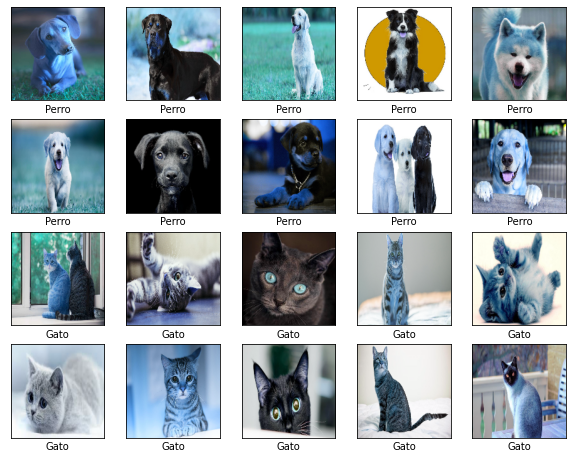

In [19]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Images[i])
    plt.xlabel(class_names[Labels[i]])
plt.show()

*Mandamos llamar todas las librerias y módulos necesarios para construir la red neuronal y declarar el algoritmo de entrenamiento*

In [21]:
from __future__ import absolute_import, division, print_function, unicode_literals

variable_name = ""
try:
  # %tensorflow_version solo exite en google colab.
  %tensorflow_version 2.x
except Exception:
  pass

from __future__ import absolute_import, division, print_function, unicode_literals


# importamos TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import tensorflow.keras.optimizers as Optimizer

# Librerías de ayuda Numpy y Pyplot
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.1


Construcción de la red y entrenamiento con **Tensorflow** Hay que recalcar que se utiliza el modelo de entrenamiento secuencial, el cual es parecido al backpropagation, utilizando una simple librería.

In [62]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(150, 150,3)),
    keras.layers.Dense(128, activation='relu'),
    
    keras.layers.Dense(2, activation='softmax'),
    
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(Images, Labels, epochs=35)
trained=model.fit(Images, Labels, epochs=35)

Epoch 1/35
1/1 [==============================] - 0s 302ms/step - loss: 39.0645 - accuracy: 0.6500
Epoch 2/35
1/1 [==============================] - 0s 35ms/step - loss: 25677.6816 - accuracy: 0.5000
Epoch 3/35
1/1 [==============================] - 0s 33ms/step - loss: 8062.7295 - accuracy: 0.5000
Epoch 4/35
1/1 [==============================] - 0s 41ms/step - loss: 5029.8389 - accuracy: 0.5000
Epoch 5/35
1/1 [==============================] - 0s 34ms/step - loss: 5400.2241 - accuracy: 0.5000
Epoch 6/35
1/1 [==============================] - 0s 31ms/step - loss: 4994.1050 - accuracy: 0.5000
Epoch 7/35
1/1 [==============================] - 0s 41ms/step - loss: 4063.7583 - accuracy: 0.5000
Epoch 8/35
1/1 [==============================] - 0s 35ms/step - loss: 2795.5898 - accuracy: 0.5000
Epoch 9/35
1/1 [==============================] - 0s 30ms/step - loss: 1465.3142 - accuracy: 0.5000
Epoch 10/35
1/1 [==============================] - 0s 31ms/step - loss: 276.3615 - accuracy: 0.5500


**Haciendo pruebas de la clasificación con las mismas imágenes que se entrenó**

In [110]:
img = Images[18]
print(img.shape)
img = (np.expand_dims(img,0))
print(img.shape)

(150, 150, 3)
(1, 150, 150, 3)


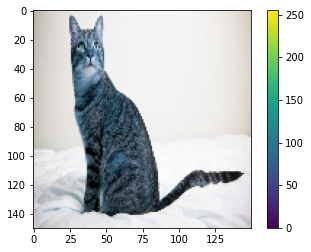

In [111]:
plt.figure()
plt.imshow(Images[18])
plt.colorbar()
plt.grid(False)
plt.show()

In [112]:
unica_prediccion = model.predict(img)
print(unica_prediccion) #Las posibles respuestas, es perro o es gato
print(np.sum(unica_prediccion))
print(np.argmax(unica_prediccion)) #El numero máximo donde se unicó para relacionarlo con la etiqueta
print(class_names[np.argmax(unica_prediccion)])

[[0. 1.]]
1.0
1
Gato


Haciendo pruebas de la clasificación con **imagenes nuevas**

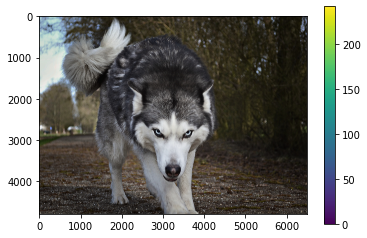

In [123]:
img = cv2.imread("prueba4.jpg")
img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.colorbar()
plt.grid(False)
plt.show()

In [124]:
img2 = img_cvt
img2 = cv2.resize(img2,(img_size,img_size))
print(img2.shape)
img2 = (np.expand_dims(img2,0))
print(img2.shape)

(150, 150, 3)
(1, 150, 150, 3)


In [125]:
unica_prediccion = model.predict(img2)
print(unica_prediccion) #Las posibles respuestas, es perro o es gato
print(np.sum(unica_prediccion))
print(np.argmax(unica_prediccion)) #El numero máximo donde se ubicó para relacionarlo con la etiqueta
print(class_names[np.argmax(unica_prediccion)])

[[1. 0.]]
1.0
0
Perro
